# qerasure Demo: Erasure, Lowering, and Logical Stim Circuit

This notebook runs 10 shots on a distance-3 rotated surface code, lets you select a shot index `n`, visualizes erasure/lowering timelines, and prints the logical Stim circuit for that shot.


In [1]:
# Ensure local qerasure package/bindings are importable from this notebook.
import sys
from pathlib import Path

repo_root = Path.cwd().resolve().parent if Path.cwd().name == 'apps' else Path.cwd().resolve()
sys.path.insert(0, str(repo_root / 'python'))
sys.path.insert(0, str(repo_root / 'build-release'))

print('Using repo root:', repo_root)


Using repo root: /Users/aryakakodkar/Documents/qerasure


In [2]:
from qerasure import (
    RotatedSurfaceCode,
    NoiseParams,
    NoiseChannel,
    ErasureSimParams,
    ErasureSimulator,
    LoweredErrorParams,
    LoweringParams,
    Lowerer,
    SpreadProgram,
    SpreadTargetOp,
    PartnerSlot,
    PauliError,
    visualize_erasures,
    visualize_lowering,
    build_logical_stabilizer_circuit,
)


In [3]:
import matplotlib.pyplot as plt

In [4]:
# Build a d=3 rotated surface code and simulation inputs.
code = RotatedSurfaceCode(3)

noise = NoiseParams()
noise.set(NoiseChannel.TWO_QUBIT_ERASURE, 0.01)

sim_params = ErasureSimParams(
    code=code,
    noise=noise,
    qec_rounds=3,
    shots=10,
    seed=12345,
)


In [ ]:
# Configure a simple lowering model.
program = SpreadProgram()
program.add_error_channel(0.5, [SpreadTargetOp(PauliError.X_ERROR, PartnerSlot.X_1)])
program.add_error_channel(0.5, [SpreadTargetOp(PauliError.Z_ERROR, PartnerSlot.Z_1)])

reset = LoweredErrorParams(PauliError.Z_ERROR, 1.0)
lowering_params = LoweringParams(default_program=program, reset_params=reset)


In [6]:
# Run erasure simulation and lowering on all 10 shots.
simulator = ErasureSimulator(sim_params)
sim_result = simulator.simulate()

lowerer = Lowerer(code, lowering_params)
lowering_result = lowerer.lower(sim_result)

print(f"Simulated shots: {len(sim_result.sparse_erasures)}")
print(f"Lowered shots: {len(lowering_result.sparse_cliffords)}")


Simulated shots: 10
Lowered shots: 10


In [13]:
# Pick shot index n (0 <= n < 10).
n = 2
assert 0 <= n < 10

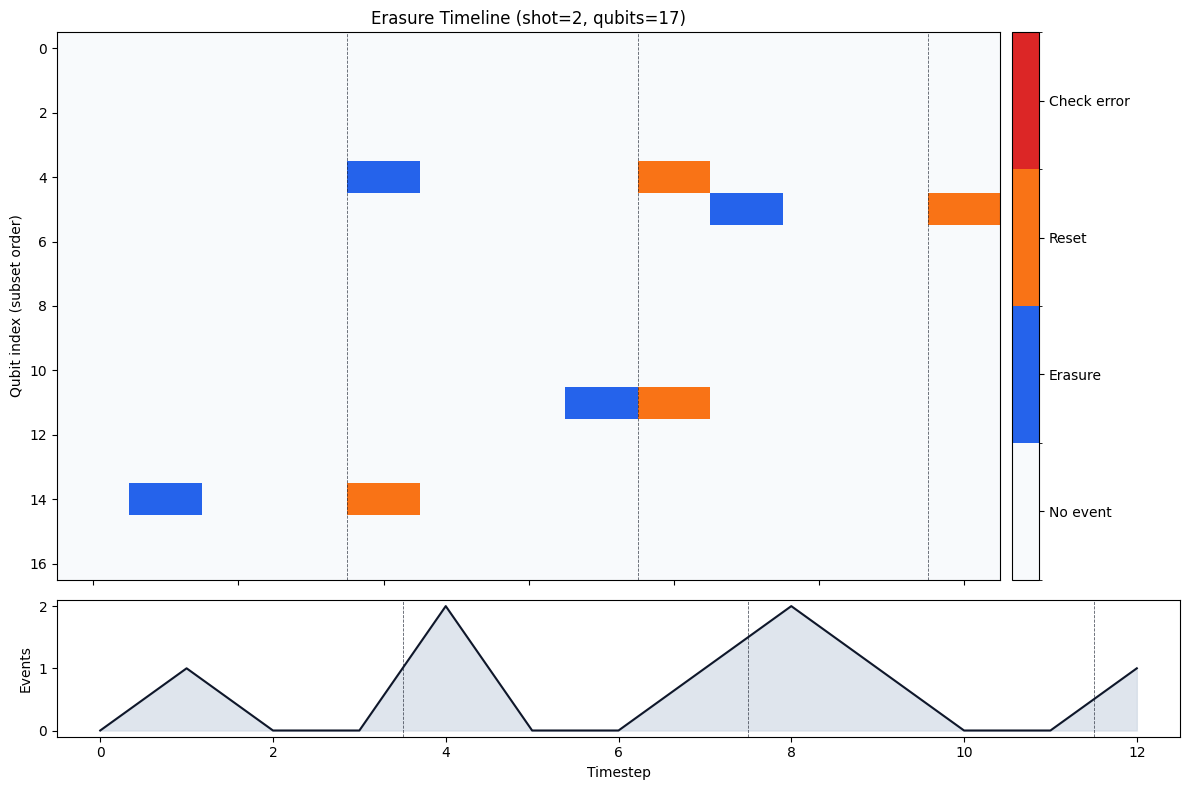

In [14]:
# Visualize erasure timeline for shot n.
fig_e, _ = visualize_erasures(sim_result, sim_params, shot_idx=n)
plt.show()


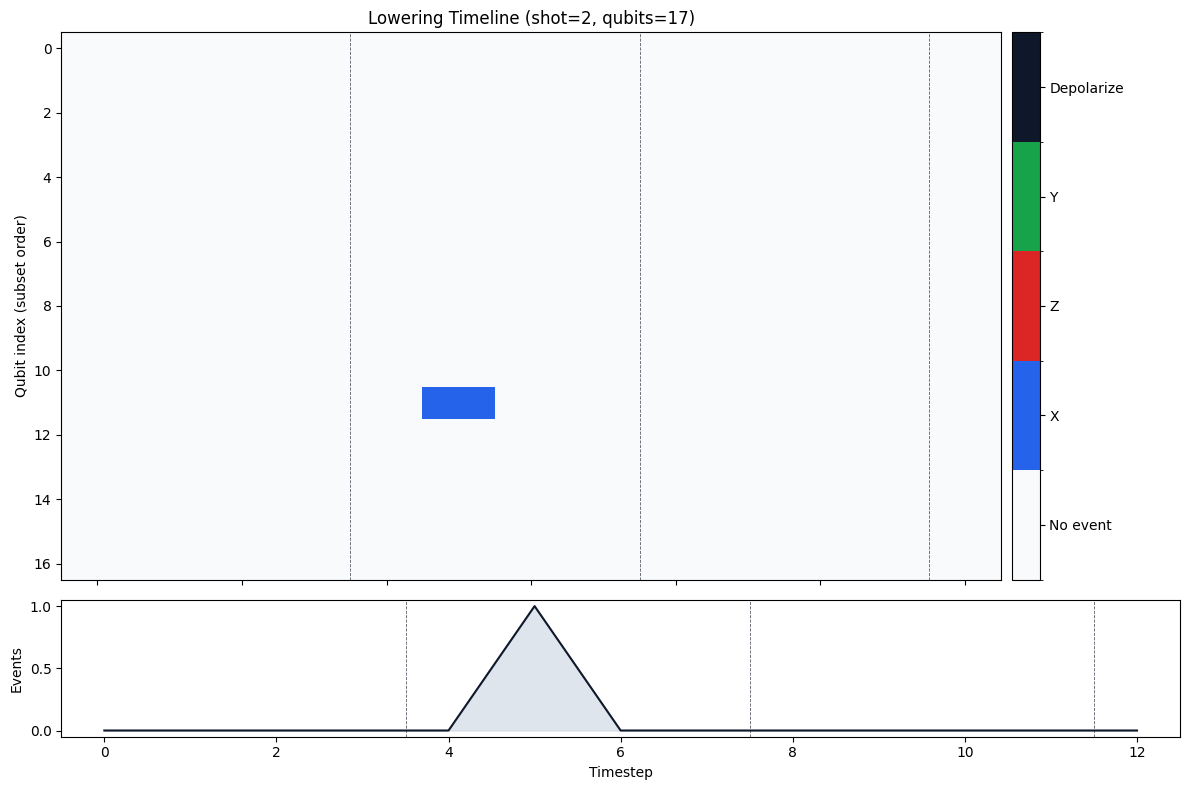

In [15]:
# Visualize lowering timeline for shot n.
fig_l, _ = visualize_lowering(lowering_result, sim_params, shot_idx=n)
plt.show()


In [ ]:
# Build and print the logical Stim circuit for shot n.
logical_circuit_str = build_logical_stabilizer_circuit(code, lowering_result, shot_index=n)
print(logical_circuit_str)
